In [25]:
#alle packages die ich verwenden werde, hat chatgpt gesagt

from uncertainties import ufloat
from uncertainties.umath import sqrt
from uncertainties import unumpy as unp
import matplotlib.pyplot as plt
import numpy as np
from uncertainties.umath import *
import pandas as pd
from uncertainties.umath import sin, radians #achtung in bogenmaß eingeben
from IPython.display import display, Latex

# Brechung, Dispersion und Spektroskopie

21. Oktober 2025

Anna Andreatta, Jeppe Vogler
  
## Disperionskurve eines optischen Glases
  
### Winkel der minimalen Ablenkung
  
 Einzelne Spektrallinien werden unterschiedlich stark gebrochen, wobei der Winkel der kleinsten Gesamtablenkung mittels des Goniometers bestimmt wird. Diese ist genau dann erreicht, wenn der Strahlengang durch das Prisma symmetrisch verläuft. Aus diesen minimalen Ablenkungen und der Geometrie des Prismas lässt sich nach dem Brechungsgesetz von Snellius der jeweilige Brechungsindex bestimmen: 
 $$
n = \frac{\sin\left(\frac{\varepsilon + \delta_{\text{min}}}{2}\right)}{\sin\left(\frac{\varepsilon}{2}\right)}
$$
Das Python-Programm berechnet die Unsicherheit dabei automatisch. 

Reihenfolge der Farben:
1. violett
2. dunkelblau
3. türkis
4. grün
5. gelb


In [26]:
# 1.2.1 winkel der minimalen ablenkung mit dem goniometer

# ableseunsicherheit
au = 20/(60) # eine winkelminute

# 1. prismawinkel, ohne unsicherheit angenommen
alpha_deg = 60.0 # in grad


# 2. unabgelenkter winkel phi_1
phi_1 = ufloat((7*60+40)/(60), au) # wert und unsicherheit

# 3. abgelenkte winkel phi_2
phi_2 = unp.uarray([(44*60+20)/(60), (43*60+20)/(60), 42, 41, (40*60+40)/(60)], au) #violett, dunkelblau, türkis, grün, gelb 

# achtung auf angabe der winkel, in min??? 

# minimale ablenkung
delta_min = [phi_1 + phi for phi in phi_2]

# berechnung des brechungsindex
def brechungsindex(alpha_deg, delta):
    alpha_rad = np.radians(alpha_deg) # konstanter wert
    delta_rad = radians(delta)

    n = sin((alpha_rad + delta_rad)/2) / sin(alpha_rad / 2)
    return n

n_values = [brechungsindex(alpha_deg, delta) for delta in delta_min]

n_neu = unp.uarray(unp.nominal_values(n_values), 0.01) #gibt uns n mit angepasster (nicht berechneter) unsicherheit, weil die berechneten so klein sind, argumentiere mit ableseunsicherheit


# darstellung als tabelle (kein plan was abgeht)
data = []
for i, (delta, n) in enumerate(zip(delta_min, n_neu), start=1):
    data.append({
        "Spektrallinie": i, #hier kann man auch eine liste mit farben machen, achtung auf die reihenfolge!! und achtung auf das i, das machts glaub ich kaputt
        "δ_min [°]": f"{delta.n:.2f} ± {delta.s:.2f}",
        "n": f"{n.n:.2f} ± {n.s:.2f}" # die zahlen vor f sagen, wie viele nachkommastellen angezeigt werden
    })

# pandas dataframe erstellen
df = pd.DataFrame(data)

# tabelle anzeigen
display(df)


,Spektrallinie,δ_min [°],n
0,1,52.00 ± 0.47,1.66 ± 0.01
1,2,51.00 ± 0.47,1.65 ± 0.01
2,3,49.67 ± 0.47,1.63 ± 0.01
3,4,48.67 ± 0.47,1.62 ± 0.01
4,5,48.33 ± 0.47,1.62 ± 0.01


### Spektrum einer Quecksilberlampe
  
Durch Zuhilfenahme eines Gitterspektrometers und des Programms OceanView können die Emmisionslinie und deren Wellenlängen einer Quecksilberlampe analysiert und bestimmt werden. Die Unsicherheiten werden aus den Halbwertsbreiten der jeweiligen Maxima ermittelt.

Siehe Abbildungsverzeichnis: Abbildung 1: Ergebnisse in OceanView

In [27]:
#tabelle zur manuellen eintragung der wellenlängen
lambda_nm = unp.uarray([406, 437, 493, 547, 577], [2, 2, 2, 2, 2]) #wellenlängen in nm (2. Halbwärtsbreite als Unsicherheit)
lambda_nm_ohne_unsicherheiten = np.array([404, 435, 491, 545, 577])

farben = ["violett", "dunkelblau", "türkis", "grün", "gelb"]

wavelength_data = {
    "Spektrallinie": farben, #achtung auf die reihenfolge!!
    "λ [nm]": lambda_nm
}
df_lambda = pd.DataFrame(wavelength_data)

#tabelle anzeigen
print("\nWellenlängen, bestimmt mit OceanView")
display(df_lambda)



Wellenlängen, bestimmt mit OceanView


,Spektrallinie,λ [nm]
0,violett,406.0+/-2.0
1,dunkelblau,437.0+/-2.0
2,türkis,493.0+/-2.0
3,grün,547.0+/-2.0
4,gelb,577.0+/-2.0


### Dispersionskurve n(λ) des Prismas
 
 

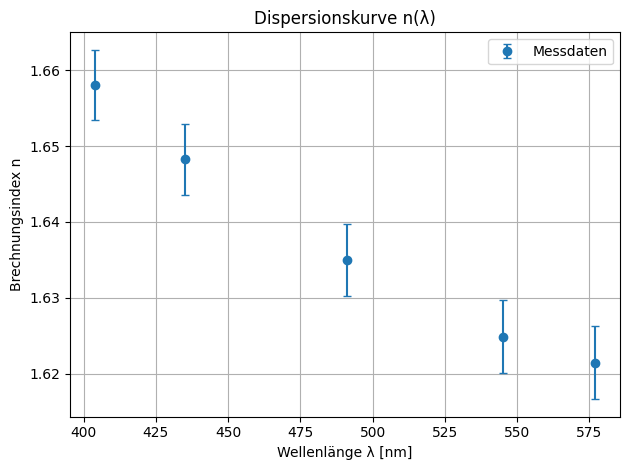

In [28]:
# tabelle brechungsindizes gegen wellenlänge

#für den plot mit fehlerbalken: unsicherheiten extrahieren
n_vals = unp.nominal_values(n_values)
n_errs = unp.std_devs(n_values)

#plot erstellen
plt.errorbar(lambda_nm_ohne_unsicherheiten, n_vals, yerr=n_errs, fmt='o', capsize=3, label="Messdaten") #x-achse, y-achse, vertikale fehlerbalken, punkte als marker, größe der balkenenden, legendenname
plt.xlabel("Wellenlänge λ [nm]")
plt.ylabel("Brechnungsindex n")
plt.title("Dispersionskurve n(λ)")
plt.grid(True) #rasterlinien anzeigen
plt.legend() #legende anzeigen
plt.tight_layout() #automatischer abstand
plt.show() #plot anzeigen


Durch den Vergleich mit Literaturwerten lässt sich feststellen, dass das Prisma aus Flintglas (Brechungsindex ca. 1,5 - 2,0) besteht [1]. 

## Absorptions-Spektroskopie
  
### Vergleich mit Literaturwerten
  
Durch den Vergleich mit den Literaturwerten aus dem Vorbereitungtext lässt sich feststellen, dass es sich bei unserer Probe um Praseodym handelt. 
  

In [29]:
#vergleichstabelle

#neodym absorptionsmaxima
neodym_data = {
    "Farbe": ["grün", "grün", "gelb", "dunkelrot", "infrarot", "infrarot"],
    "λ [nm]": [510, 522, 578, 740, 799, 868]
}
df_neodym = pd.DataFrame(neodym_data)

#praseodym absorptionsmaxima
praseodym_data = {
    "Farbe": ["blau", "türkisblau", "türkis", "gelborange"],
    "λ [nm]": [444, 468, 481, 590]
}
df_praseodym = pd.DataFrame(praseodym_data)

#referenztabelle auswählen
df_literatur = df_praseodym #sonst ändern

messwerte_von_oceanview = np.array([445, 469, 483, 591]) #gleiche länge wie referenztabelle oviously
messwerte_mit_unsicherheit = unp.uarray([445, 469, 483, 591], [4, 4, 3, 7])

#umwandeln in arrays
literaturwerte = df_literatur["λ [nm]"]

differenz = messwerte_von_oceanview - literaturwerte

#vergleichstabelle
vergleich_tabelle = pd.DataFrame({
    "Farbe": df_literatur["Farbe"],
    "λ Praseodym [nm]": literaturwerte, #achtung hier auch wort neodym ändern wenns is
    "λ gemessen [nm]": messwerte_mit_unsicherheit,
    "Abweichung [nm]": differenz
})

display(vergleich_tabelle)


,Farbe,λ Praseodym [nm],λ gemessen [nm],Abweichung [nm]
0,blau,444,445+/-4,1
1,türkisblau,468,469+/-4,1
2,türkis,481,483.0+/-3.0,2
3,gelborange,590,591+/-7,1


## Diskussion 
  
Bei der Bestimmung des Emissionsspektrum des Flintglasprismas lässt sich feststellen, dass sich das Ablesen des Goniometers als äußerst schwierig erwies, weshalb eine Unsicherheit von 20 Bogenminuten angenommen wurde. Zusätzlich wurde aufgrund dieser Tatsache die Unsicherheit der Brechungsindizes manuell auf 0,01 angehoben, ansonsten würde die rechnerische Unsicherheit eine Genauigkeit suggerieren, welche beim Ablesen nicht vorhanden war. Dies bezieht sich auch auf das Ablesen der halben Halbwertsbreite. Unsere Brechungsindizes gleichen sich mit den Literaturwerten von optischem Flintglas von 1,5 bis 2,0, welches damit über dem von Borsilikat liegt.

Bei der Bestimmung der unbekannten Flüssigkeit durch Absorptionsspektroskopie lässt sich feststellen, dass ebenfalls das Ablesen der Halbwertsbreite subjektiv behaftet ist. Zusätzlich befindet sich unser Spektrum rund 1-2nm über dem des Referenzspektrums, was sich aber innerhalb der ermittelten Unsicherheiten befindet. Daher lässt sich eindeutig Praseodym identifizieren, da die Differenz zu Neodym deutlich ist.  

## Quellenverzeichnis
  
[1] https://www.chemie.de/lexikon/Flintglas.html (28.10.2025)
  